In [1]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import requests
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import folium
import re
import plotly.express as px
import pycountry

In [3]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ronifahima/project-Roni-and-Gil/main/lovoo_v3_users_api-results%20(1).csv'
df = pd.read_csv(url)
df

gender genderLooking  age          name  counts_details  counts_pictures  \
0         F             M   25         daeni            1.00                4   
1         F             M   22   italiana 92            0.85                5   
2         F             M   21       Lauraaa            0.00                4   
3         F          none   20    Qqkwmdowlo            0.12                3   
4         F             M   21  schaessie {3            0.15               12   
...     ...           ...  ...           ...             ...              ...   
3987      F             M   22        Ser**a            0.85                6   
3988      F             M   24        Mon**a            1.00                7   
3989      F             M   20         Fa**y            0.90                4   
3990      F             M   20         Fa**y            0.90                4   
3991      F             M   20         Fa**y            0.90                4   

      counts_profileVisits  counts_kisses  counts_fans  counts_g  ...  \
0                     8279            239            0         3  ...   
1                      663             13            0         0  ...   
2                     1369             88            0         2  ...   
3                    22187           1015            2         3  ...   
4                    35262           1413            9        12  ...   
...                    ...            ...          ...       ...  ...   
3987                  1003             98            0         0  ...   
3988                  6890            563            0         0  ...   
3989                  1157             52            1         0  ...   
3990                  1157             52            1         0  ...   
3991                  1157             52            1         0  ...   

      shareProfileEnabled        lastOnlineDate  lastOnlineTime birthd crypt  \
0                       1  2015-04-25T20:43:26Z    1.429995e+09      0   NaN   
1                       1  2015-04-26T09:19:35Z    1.430040e+09      0   NaN   
2                       1  2015-04-06T14:24:07Z    1.428330e+09      0   NaN   
3                       1  2015-04-07T11:21:01Z    1.428406e+09      0   NaN   
4                       1  2015-04-06T14:25:20Z    1.428330e+09      0   NaN   
...                   ...                   ...             ...    ...   ...   
3987                    1  2015-04-05T07:13:49Z    1.428218e+09      0   1.0   
3988                    1  2015-04-19T11:00:59Z    1.429441e+09      0   1.0   
3989                    1  2015-04-19T08:37:52Z    1.429433e+09      0   1.0   
3990                    1  2015-04-19T08:37:52Z    1.429433e+09      0   1.0   
3991                    1  2015-04-19T08:37:52Z    1.429433e+09      0   1.0   

                                    freetext  \
0     Nur tote Fisch schwimmen mit dem Strom   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   
...                                      ...   
3987                                     NaN   
3988                                     NaN   
3989                                     NaN   
3990                                     NaN   
3991                                     NaN   

                                            whazzup  \
0           Nur tote fische schwimmen mit dem strom   
1                                     Primaveraaa<3   
2                                               NaN   
3          Je pense donc je suis.  Instagram quedev   
4                             Instagram: JESSSIESCH   
...                                             ...   
3987                               Fiesta and sport   
3988  tous des créatures de Dieu, y'a pas de VIP!!!   
3989                                            NaN   
3990                                            NaN   
3991        

In [46]:
df.columns

Index(['gender', 'genderLooking', 'age', 'name', 'counts_details',
       'counts_pictures', 'counts_profileVisits', 'counts_kisses',
       'counts_fans', 'counts_g', 'flirtInterests_chat',
       'flirtInterests_friends', 'flirtInterests_date', 'country', 'city',
       'location', 'distance', 'isFlirtstar', 'isHighlighted', 'isInfluencer',
       'isMobile', 'isNew', 'isOnline', 'isVip', 'lang_count', 'lang_fr',
       'lang_en', 'lang_de', 'lang_it', 'lang_es', 'lang_pt', 'verified',
       'shareProfileEnabled', 'lastOnlineDate', 'lastOnlineTime', 'birthd',
       'crypt', 'freetext', 'whazzup', 'userId', 'pictureId',
       'isSystemProfile', 'full_name_country', 'last_time', 'last_date',
       'year_month'],
      dtype='object')

gender                       0
genderLooking                0
age                          0
name                         0
counts_details               0
counts_pictures              0
counts_profileVisits         0
counts_kisses                0
counts_fans                  0
counts_g                     0
flirtInterests_chat          0
flirtInterests_friends       0
flirtInterests_date          0
country                      0
city                       287
location                    13
distance                    46
isFlirtstar                  0
isHighlighted                0
isInfluencer                 0
isMobile                     0
isNew                        0
isOnline                     0
isVip                        0
lang_count                   0
lang_fr                      0
lang_en                      0
lang_de                      0
lang_it                      0
lang_es                      0
lang_pt                      0
verified                     0
sharePro

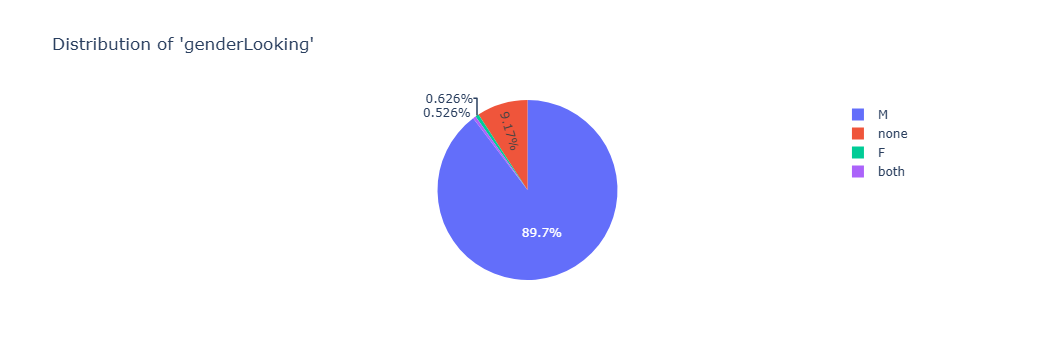

In [5]:
gender_looking_counts = df['genderLooking'].value_counts()

# Create a pie chart
fig = px.pie(gender_looking_counts, 
             values=gender_looking_counts.values, 
             names=gender_looking_counts.index, 
             title="Distribution of 'genderLooking'")

fig.show()

In [6]:
full_name_country={
    'AR': 'Argentina',
    'AT': 'Austria',
    'AU': 'Australia',
    'BA': 'Bosnia and Herzegovina',
    'BE': 'Belgium',
    'BR': 'Brazil',
    'CA': 'Canada',
    'CF': 'Central African Republic',
    'CH': 'Switzerland',
    'CZ': 'Czech Republic',
    'DE': 'Germany',
    'ES': 'Spain',
    'ET': 'Ethiopia',
    'FR': 'France',
    'GB': 'United Kingdom (UK)',
    'HU': 'Hungary',
    'ID': 'Indonesia',
    'IN': 'India',
    'IT': 'Italy',
    'JM': 'Jamaica',
    'LI': 'Liechtenstein',
    'LR': 'Liberia',
    'LU': 'Luxembourg',
    'NL': 'Netherlands',
    'PE': 'Peru',
    'PH': 'Philippines',
    'RO': 'Romania',
    'RU': 'Russia',
    'SC': 'Seychelles',
    'TR': 'Turkey',
    'UA': 'Ukraine',
    'US': 'United States'}
df['full_name_country'] = df['country'].apply(lambda x: full_name_country[x])

In [16]:
df[['last_date', 'last_time']] = df['lastOnlineDate'].str.split('T', expand=True)

# Remove the 'Z' from the 'time' column if it exists
df['last_time'] = df['last_time'].str.replace('Z', '')

# Convert 'date' column to datetime
df['last_date'] = pd.to_datetime(df['last_date'])

# Display the first few rows to verify the changes
print(df[['lastOnlineDate', 'last_date', 'last_time']].head())

         lastOnlineDate  last_date last_time
0  2015-04-25T20:43:26Z 2015-04-25  20:43:26
1  2015-04-26T09:19:35Z 2015-04-26  09:19:35
2  2015-04-06T14:24:07Z 2015-04-06  14:24:07
3  2015-04-07T11:21:01Z 2015-04-07  11:21:01
4  2015-04-06T14:25:20Z 2015-04-06  14:25:20


In [18]:
df.columns

Index(['gender', 'genderLooking', 'age', 'name', 'counts_details',
       'counts_pictures', 'counts_profileVisits', 'counts_kisses',
       'counts_fans', 'counts_g', 'flirtInterests_chat',
       'flirtInterests_friends', 'flirtInterests_date', 'country', 'city',
       'location', 'distance', 'isFlirtstar', 'isHighlighted', 'isInfluencer',
       'isMobile', 'isNew', 'isOnline', 'isVip', 'lang_count', 'lang_fr',
       'lang_en', 'lang_de', 'lang_it', 'lang_es', 'lang_pt', 'verified',
       'shareProfileEnabled', 'lastOnlineDate', 'lastOnlineTime', 'birthd',
       'crypt', 'freetext', 'whazzup', 'userId', 'pictureId',
       'isSystemProfile', 'full_name_country', 'last_time', 'last_date'],
      dtype='object')

In [44]:
earliest_date= df["last_date"].min()
lastest_date=df["last_date"].max()
earliest_date
#lastest_date

Timestamp('2015-03-17 00:00:00')

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(y=df['last_date'])
plt.title('Distribution of Last Online Dates')
plt.ylabel('last_date')
plt.tight_layout()

# Show the plot
plt.show()

TypeError: Vertical orientation requires numeric `y` variable.

<Figure size 1200x600 with 0 Axes>

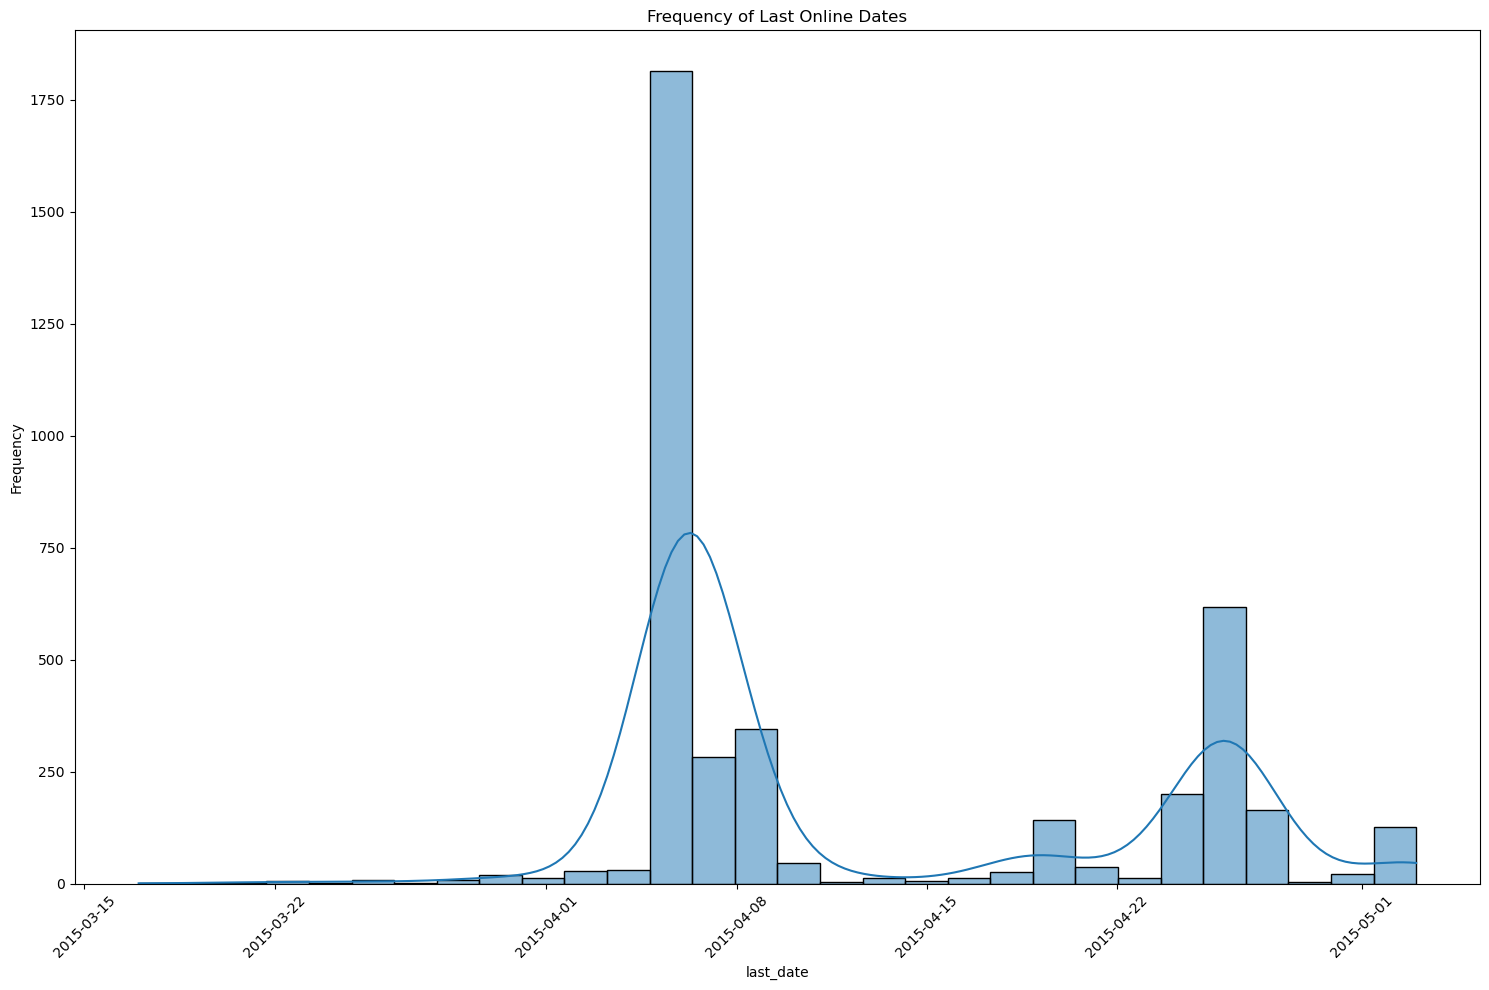

In [42]:
plt.figure(figsize=(15, 10))
sns.histplot(df['last_date'], bins=30, kde=True)
plt.title('Frequency of Last Online Dates')
plt.xlabel('last_date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:


# מציאת התאריך הכי נפוץ בעמודה 'last_date'
most_common_date = df['last_date'].value_counts().idxmax()
most_common_date_count = df['last_date'].value_counts().max()

print(f"התאריך הכי נפוץ הוא: {most_common_date} עם {most_common_date_count} מופעים")

התאריך הכי נפוץ הוא: 2015-04-06 00:00:00 עם 1742 מופעים


In [47]:
start_date = '2015-03-17'
end_date = '2015-04-03'
filtered_users = df[(df['last_date'] >= start_date) & (df['last_date'] <= end_date)]

# הצגת המשתמשים המסוננים
print(filtered_users)

     gender genderLooking  age                  name  counts_details  \
50        F             M   20                Regina            0.77   
54        F             M   21           Zsc_giirl18            1.00   
108       F          both   19                  Jyou            0.96   
208       F             M   20            GGeraldine            0.54   
232       F             M   23         diecaroausrhf            1.00   
...     ...           ...  ...                   ...             ...   
2724      F             M   19                  xCKM            0.00   
2725      F             M   24                 Julia            0.00   
2760      F             M   22             miss lisa            0.85   
2991      F             M   20  Caroline Piaut Meyer            0.00   
3022      F             M   19                 Elise            0.00   

      counts_pictures  counts_profileVisits  counts_kisses  counts_fans  \
50                 11                 11120            216  

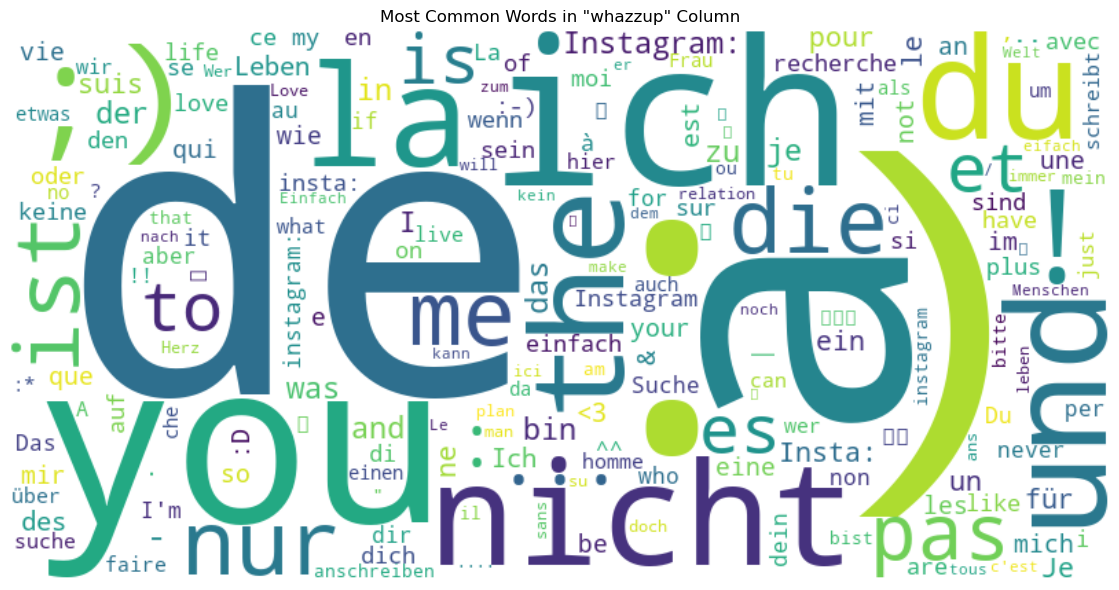

המילה הכי נפוצה היא: :) עם 124 מופעים


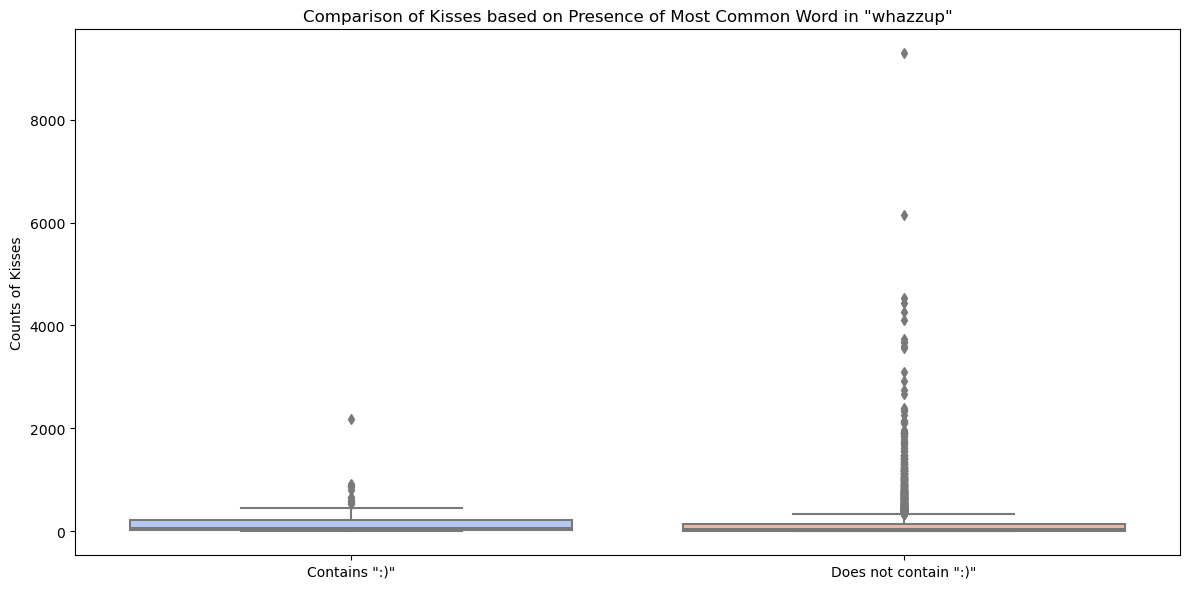

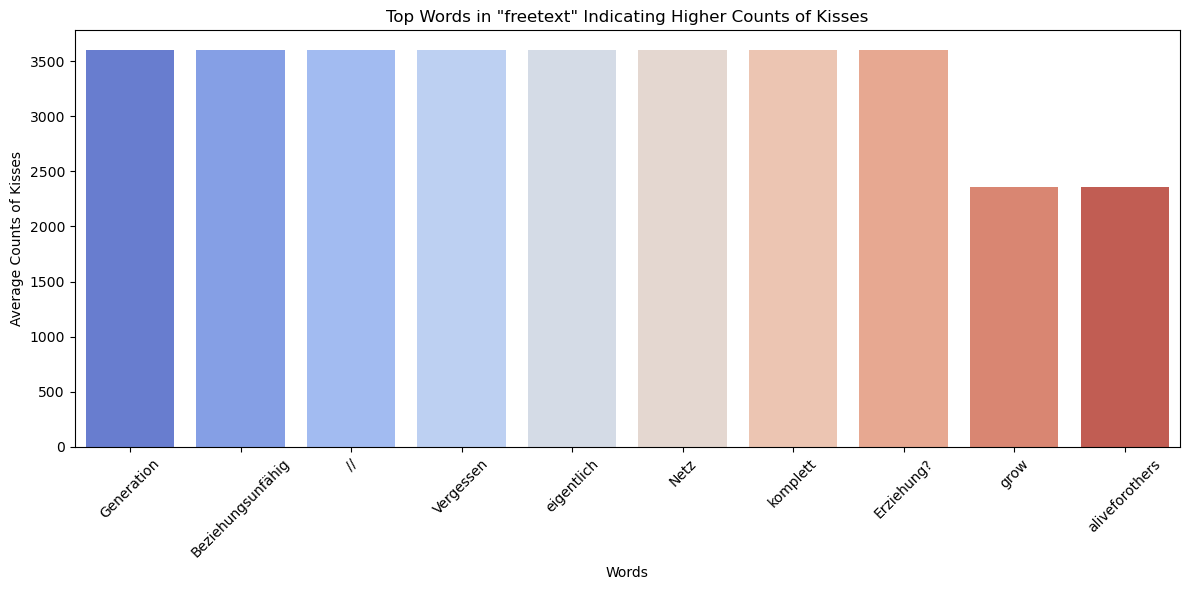

In [54]:
from collections import Counter
df['freetext'] = df['freetext'].astype(str).fillna('')
all_words = ' '.join(df['freetext']).split()
word_counts = Counter(all_words)

# Calculate average 'counts_kisses' for each word
word_kisses = {}
for word in word_counts:
    # Escape special characters in the word
    safe_word = re.escape(word)
    word_kisses[word] = df[df['freetext'].str.contains(safe_word, regex=True)]['counts_kisses'].mean()

# Convert to DataFrame for visualization
word_kisses_df = pd.DataFrame.from_dict(word_kisses, orient='index', columns=['average_kisses'])
word_kisses_df = word_kisses_df.sort_values(by='average_kisses', ascending=False).head(10)

# Plot the top words
plt.figure(figsize=(12, 6))
sns.barplot(x=word_kisses_df.index, y=word_kisses_df['average_kisses'], palette='coolwarm')
plt.title('Top Words in "freetext" Indicating Higher Counts of Kisses')
plt.xlabel('Words')
plt.ylabel('Average Counts of Kisses')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


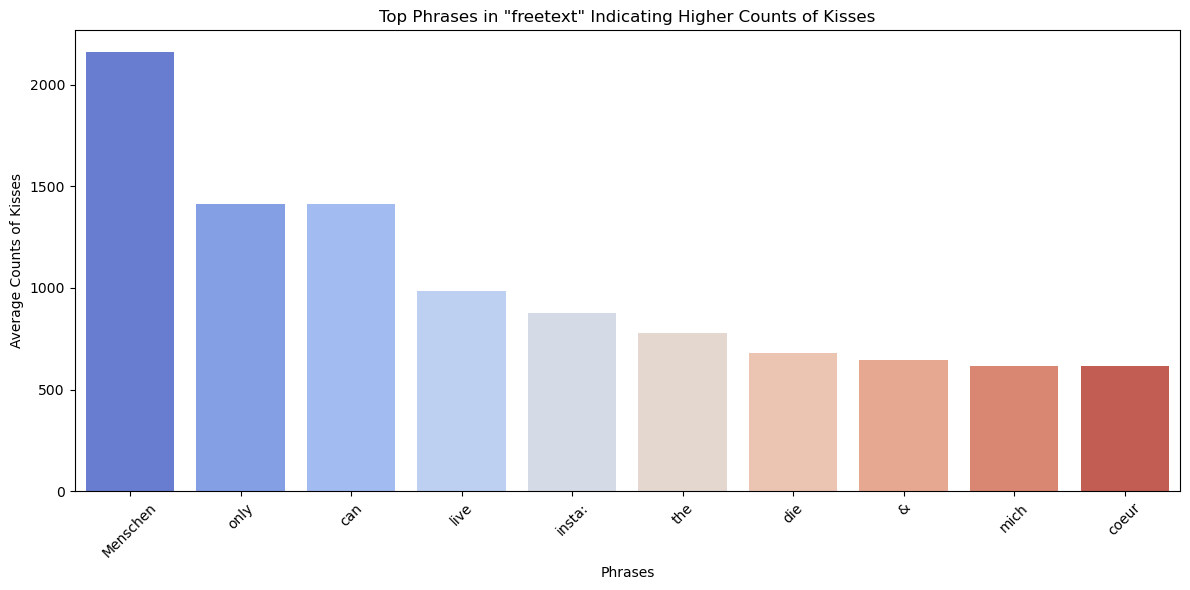

In [56]:
df['freetext'] = df['freetext'].astype(str).fillna('')

# Tokenize words/phrases in the 'freetext' column
all_phrases = ' '.join(df['freetext']).split()
phrase_counts = Counter(all_phrases)

# Filter phrases that appear multiple times
common_phrases = {phrase: count for phrase, count in phrase_counts.items() if count > 1}

# Calculate average 'counts_kisses' for each common phrase
phrase_kisses = {}
for phrase in common_phrases:
    safe_phrase = re.escape(phrase)
    phrase_kisses[phrase] = df[df['freetext'].str.contains(safe_phrase, regex=True)]['counts_kisses'].mean()

# Convert to DataFrame for visualization
phrase_kisses_df = pd.DataFrame.from_dict(phrase_kisses, orient='index', columns=['average_kisses'])
phrase_kisses_df = phrase_kisses_df.sort_values(by='average_kisses', ascending=False).head(10)

# Plot the top phrases
plt.figure(figsize=(12, 6))
sns.barplot(x=phrase_kisses_df.index, y=phrase_kisses_df['average_kisses'], palette='coolwarm')
plt.title('Top Phrases in "freetext" Indicating Higher Counts of Kisses')
plt.xlabel('Phrases')
plt.ylabel('Average Counts of Kisses')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

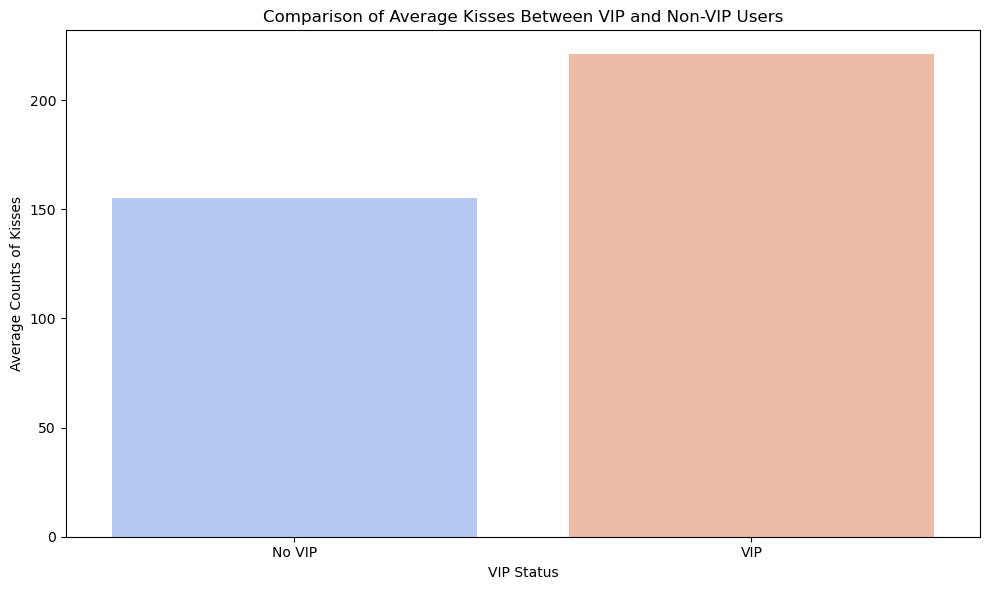

In [63]:
df['isVip'] = df['isVip'].astype(bool)

# Calculate the average number of kisses for VIP and non-VIP users
avg_kisses = df.groupby('isVip')['counts_kisses'].mean().reset_index()
avg_kisses['isVip'] = avg_kisses['isVip'].map({True: 'VIP', False: 'No VIP'})

# Create a bar plot to compare the average number of kisses
plt.figure(figsize=(10, 6))
sns.barplot(x='isVip', y='counts_kisses', data=avg_kisses, palette='coolwarm')
plt.title('Comparison of Average Kisses Between VIP and Non-VIP Users')
plt.xlabel('VIP Status')
plt.ylabel('Average Counts of Kisses')
plt.tight_layout()

# Show the plot
plt.show()


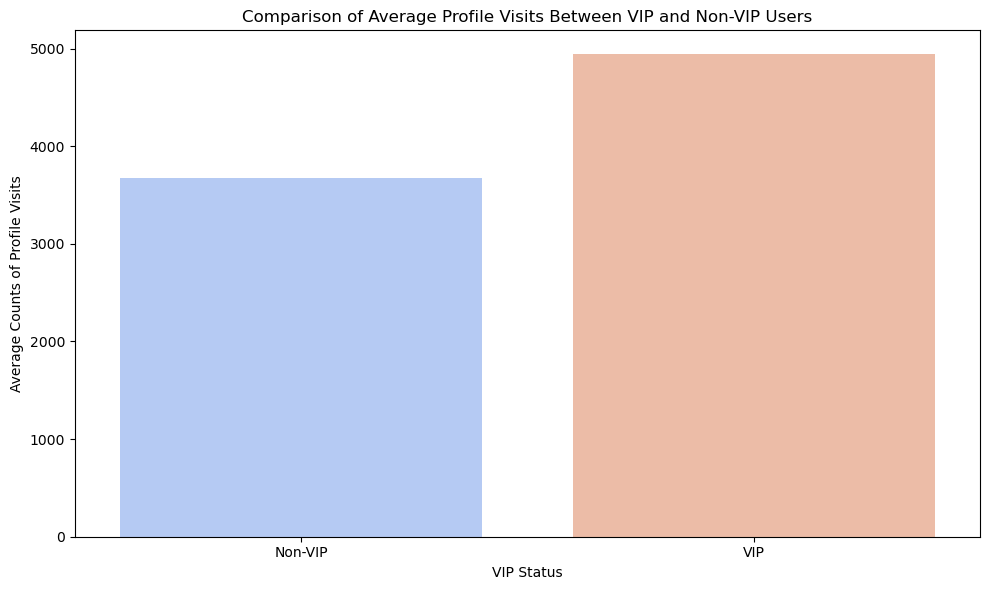

In [65]:
df['isVip'] = df['isVip'].astype(bool)

# Calculate the average number of profile visits for VIP and non-VIP users
avg_profile_visits = df.groupby('isVip')['counts_profileVisits'].mean().reset_index()
avg_profile_visits['isVip'] = avg_profile_visits['isVip'].map({True: 'VIP', False: 'Non-VIP'})

# Create a bar plot to compare the average number of profile visits
plt.figure(figsize=(10, 6))
sns.barplot(x='isVip', y='counts_profileVisits', data=avg_profile_visits, palette='coolwarm')
plt.title('Comparison of Average Profile Visits Between VIP and Non-VIP Users')
plt.xlabel('VIP Status')
plt.ylabel('Average Counts of Profile Visits')
plt.tight_layout()

# Show the plot
plt.show()

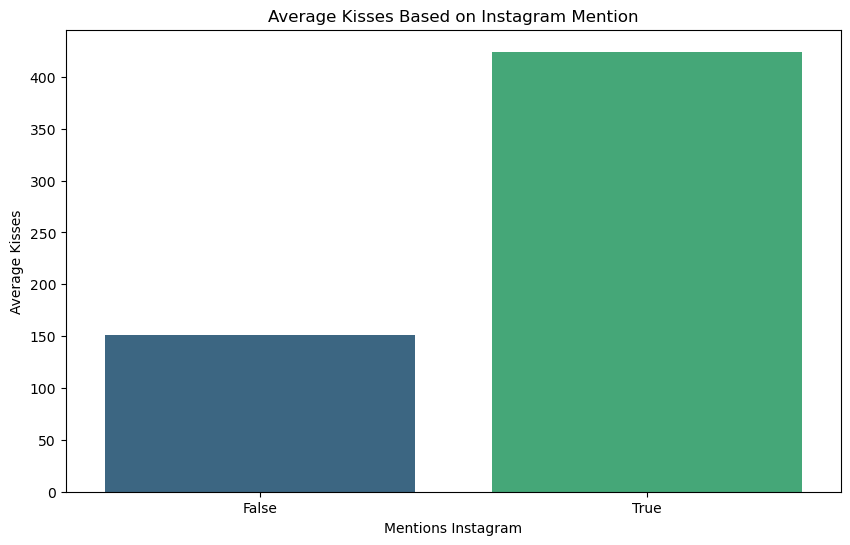

In [71]:
df['mentions_instagram'] = df[['freetext', 'whazzup']].apply(lambda x: 'Instagram' in ' '.join(x.dropna().astype(str)), axis=1)

# Grouping data by whether Instagram is mentioned and calculating the mean of kisses
instagram_kisses = df.groupby('mentions_instagram')['counts_kisses'].mean()

# Creating a DataFrame for the results
instagram_kisses_df = pd.DataFrame(instagram_kisses).reset_index()
instagram_kisses_df.columns = ['Mentions Instagram', 'Average Kisses']

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(data=instagram_kisses_df, x='Mentions Instagram', y='Average Kisses', palette='viridis')
plt.title('Average Kisses Based on Instagram Mention')
plt.xlabel('Mentions Instagram')
plt.ylabel('Average Kisses')
plt.show()

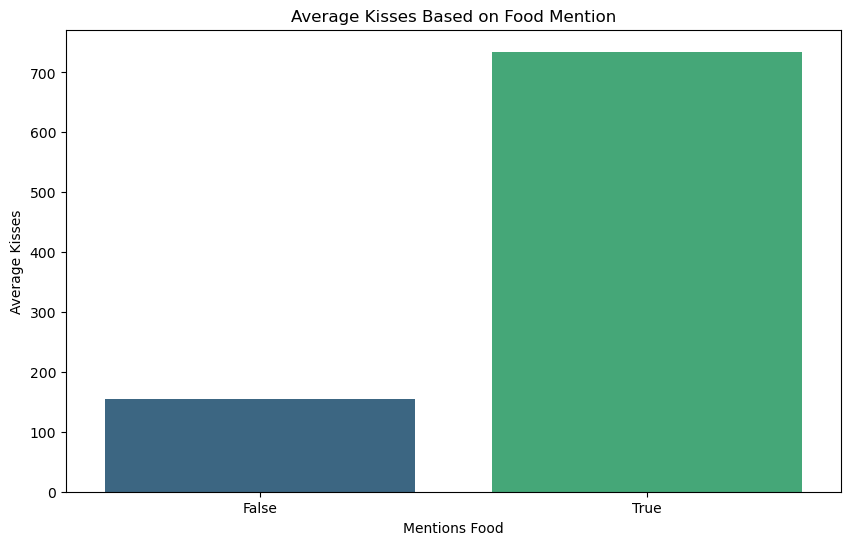

In [79]:
food_keywords = ['food', 'essen', 'comida', 'cibo', 'alimentos', 'aliment', '食品', 'еда', '식품', 'makanan', 'alimentación', 'غذاء']

# Creating a new column to indicate if any food-related keyword is mentioned in the freetext or whazzup
df['mentions_food'] = df[['freetext', 'whazzup']].apply(
    lambda x: any(keyword in ' '.join(x.dropna().astype(str)).lower() for keyword in food_keywords), axis=1)

# Grouping data by whether food-related keywords are mentioned and calculating the mean of kisses
food_kisses = df.groupby('mentions_food')['counts_kisses'].mean()

# Creating a DataFrame for the results
food_kisses_df = pd.DataFrame(food_kisses).reset_index()
food_kisses_df.columns = ['Mentions Food', 'Average Kisses']

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(data=food_kisses_df, x='Mentions Food', y='Average Kisses', palette='viridis')
plt.title('Average Kisses Based on Food Mention')
plt.xlabel('Mentions Food')
plt.ylabel('Average Kisses')
plt.show()

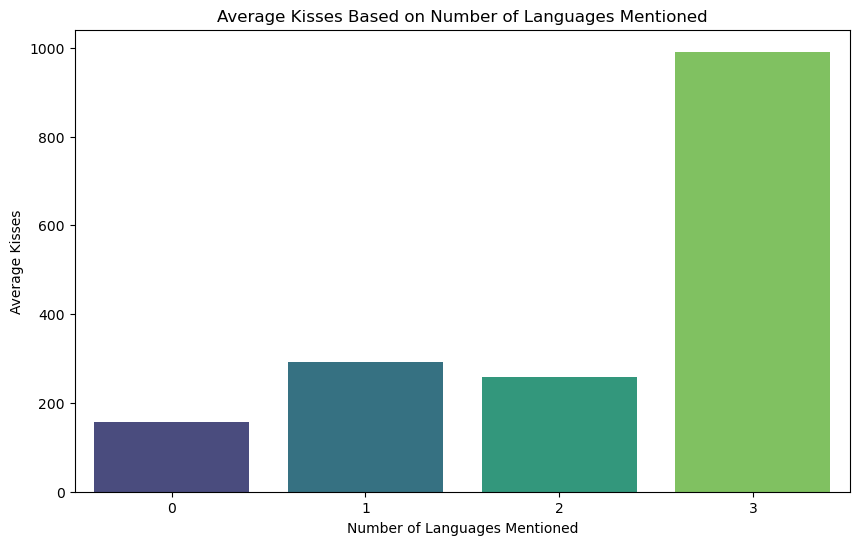

In [76]:
languages = ['english', 'spanish', 'french', 'german', 'italian', 'portuguese', 'dutch', 'russian', 'chinese', 'japanese', 'korean', 'arabic', 'hebrew']

# Creating a new column to indicate which language is mentioned in the freetext or whazzup
for language in languages:
    df[f'mentions_{language}'] = df[['freetext', 'whazzup']].apply(
        lambda x: language in ' '.join(x.dropna().astype(str)).lower(), axis=1)

# Creating a new column to count the number of languages mentioned
df['mentions_multiple_languages'] = df[[f'mentions_{language}' for language in languages]].sum(axis=1)

# Grouping data by the number of languages mentioned and calculating the mean of kisses
languages_kisses = df.groupby('mentions_multiple_languages')['counts_kisses'].mean()

# Creating a DataFrame for the results
languages_kisses_df = pd.DataFrame(languages_kisses).reset_index()
languages_kisses_df.columns = ['Number of Languages Mentioned', 'Average Kisses']

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(data=languages_kisses_df, x='Number of Languages Mentioned', y='Average Kisses', palette='viridis')
plt.title('Average Kisses Based on Number of Languages Mentioned')
plt.xlabel('Number of Languages Mentioned')
plt.ylabel('Average Kisses')
plt.show()

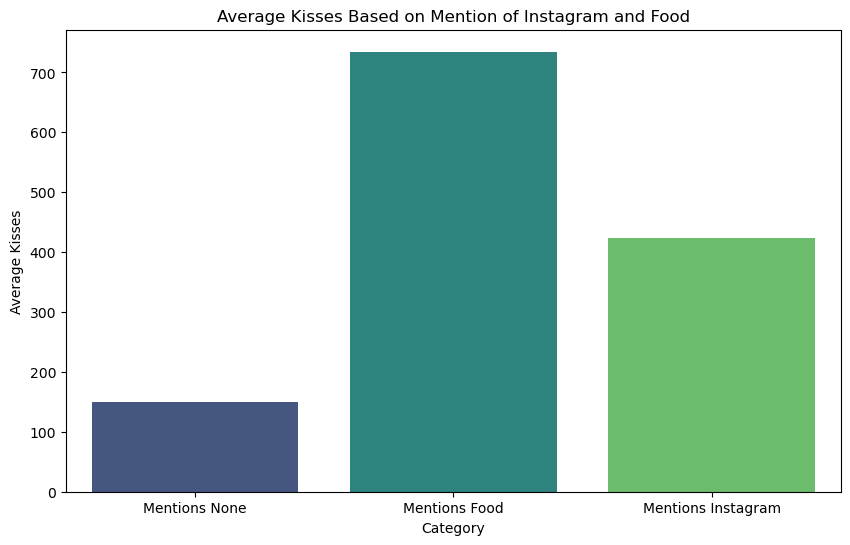

In [81]:
food_keywords = ['food', 'essen', 'comida', 'cibo', 'alimentos', 'aliment', '食品', 'еда', '식품', 'makanan', 'alimentación', 'غذاء']

# Creating a new column to indicate if 'Instagram' or food-related keywords are mentioned in the freetext or whazzup
df['mentions_instagram'] = df[['freetext', 'whazzup']].apply(lambda x: 'Instagram' in ' '.join(x.dropna().astype(str)), axis=1)
df['mentions_food'] = df[['freetext', 'whazzup']].apply(lambda x: any(keyword in ' '.join(x.dropna().astype(str)).lower() for keyword in food_keywords), axis=1)

# Grouping data to calculate the mean of kisses for different categories
comparison_kisses = df.groupby(['mentions_instagram', 'mentions_food'])['counts_kisses'].mean().reset_index()

# Mapping the categories for better readability
comparison_kisses['Category'] = comparison_kisses.apply(
    lambda row: 'Mentions Both' if row['mentions_instagram'] and row['mentions_food'] else
                'Mentions Instagram' if row['mentions_instagram'] else
                'Mentions Food' if row['mentions_food'] else
                'Mentions None', axis=1)

# Filtering to only include relevant categories (ignoring 'Mentions Both' for clear comparison)
comparison_kisses = comparison_kisses[comparison_kisses['Category'] != 'Mentions Both']

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_kisses, x='Category', y='counts_kisses', palette='viridis')
plt.title('Average Kisses Based on Mention of Instagram and Food')
plt.xlabel('Category')
plt.ylabel('Average Kisses')
plt.show()